# Image Processing
## Setup before class 
1. conda upgrade -y scikit-image - main library used for image processing
2. conda install -c conda-forge ipympl - enabling interactive tools in Jupyter Lab
3. %matplotlib widget - enabling the ipyml backend, jupyter command that tells it to show an interactive image when using matplotlib
4. data, sample images used in this workshop are available [here](https://figshare.com/articles/dataset/Data_Carpentry_Image_Processing_Data_beta_/19260677)


## Links
1. [Image Basics](#basic)
2. [Image Compression and Formats](#compress)
3. [Working with skimage](#skimage)

In [1]:
%matplotlib widget 

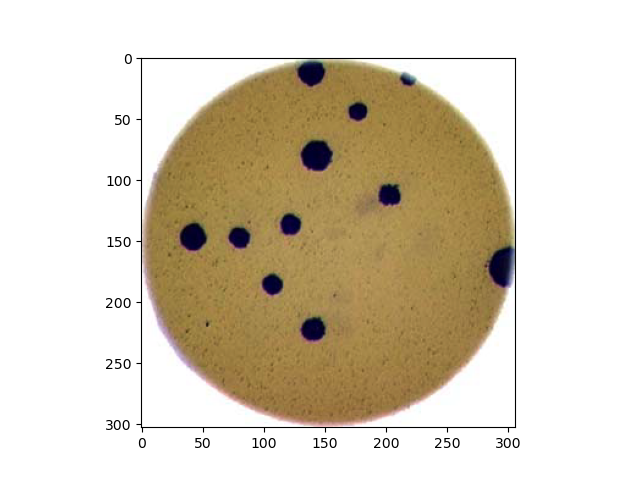

In [2]:
# Test
import skimage.io
import matplotlib.pyplot as plt
%matplotlib widget

# load an image
image = skimage.io.imread(fname='data/colonies-01.tif')

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap='gray')

## Image Basics
<a id='basic'></a>

[Class Schedule and Notes](https://datacarpentry.org/image-processing/) <br>

- images are made of pixels - discrete image unit elements.
- each pixel has one color associated with it and there can be a gradient of colors from one pixel to another
- matrices and arrays are used to work with image data
- we use a left handed coordinates and not cartesian coordinates 
- cx,ry is how we refer to pixels in an image

>        Important Functions
>        - imread()
>        - plt.imshow()
>        - imsave()
>        - transform.resize()
>        - img_as_ubyte()
>        - color.rgb2gray()

In [26]:
#Required libraries and functions
import numpy as np
from skimage.io import imread, imsave
import skimage.io 
import matplotlib.pyplot as plt

In [4]:
img = imread('data/eight.tif') #tif is a format for storing graphics
print(img) #stored as 1's and 0's as a numpy array

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [5]:
plt.imshow(img)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


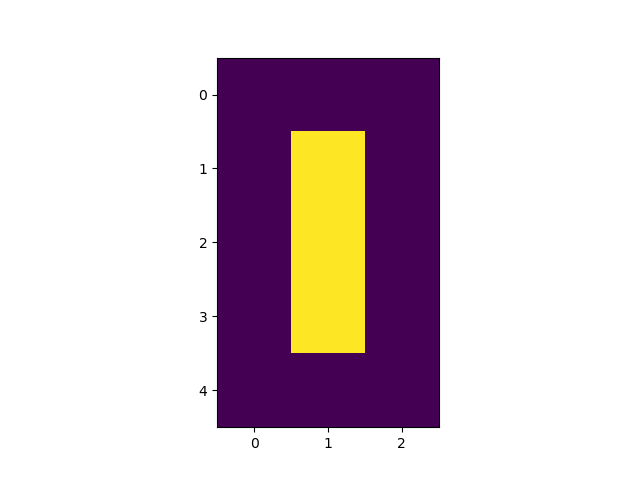

In [6]:
fig, ax = plt.subplots()
img[2,1] = 1 # as it is a numpy array, we can change the pixel at a specific position
print(img)
plt.imshow(img)

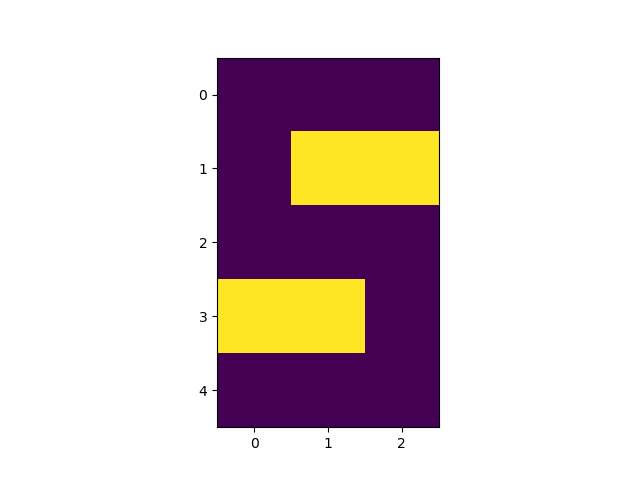

In [11]:
fig, ax = plt.subplots()
img[1,2]=1
img[3,0]=1
img[2,1] = 0
plt.imshow(img)

- 0-255 numbers to introduces colors/shades

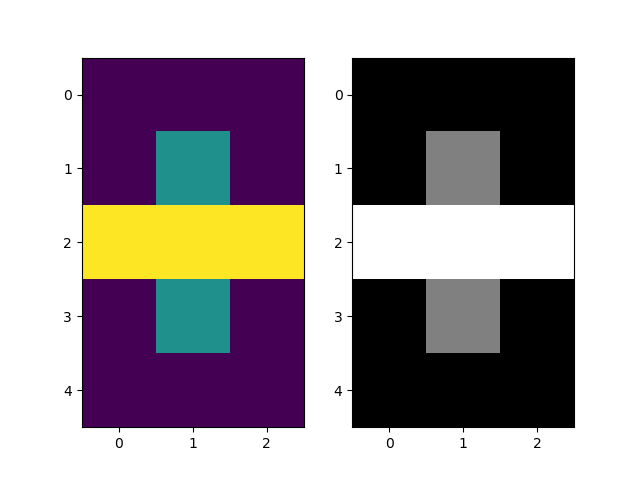

In [12]:
three_colors = imread('data/eight.tif')
three_colors = three_colors*128 #midpoint from 0-255, so good place to start
three_colors[2,:] = 255 # third row to 255
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(three_colors)
#this is a preset color palette, we can change it to grayscale using cmap
ax2.imshow(three_colors,cmap=plt.cm.gray)
plt.show()


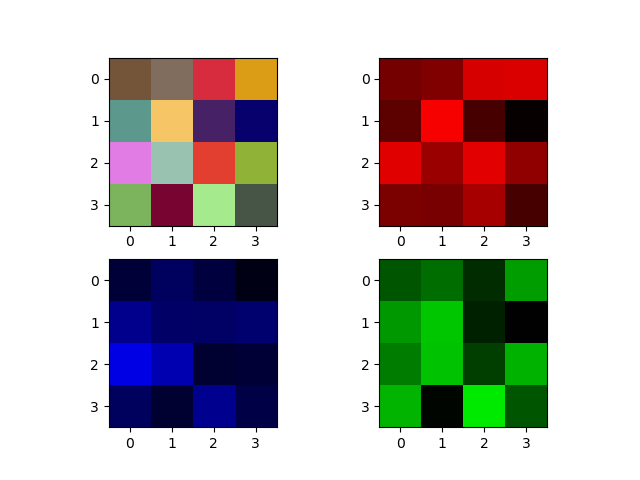

In [13]:
pseudorandomizer = np.random.RandomState(2021) #so we can get the same results, we fix the random state
checkerboard = pseudorandomizer.randint(0,255,size=(4,4,3)) #created a 4 x 4 matrix with 3 color channels (rgb), knows by default that 3 is rgb.
fig, (ax1,ax2) = plt.subplots(2,2)

ax1[0].imshow(checkerboard)

#let's show only the red channel by setting only red to 1 and the other channels to 0
red_channel = checkerboard * [1,0,0]
ax1[1].imshow(red_channel)

blue_channel = checkerboard * [0,0,1]
ax2[0].imshow(blue_channel)

green_channel = checkerboard * [0,1,0]
ax2[1].imshow(green_channel)
# print(checkerboard)

>1. 255,0,0 is red
>2. 0,255,0 is green
>3. 0,0,255 is blue
>4. 0,0,0 is black
>5. 1,1,1 is white
>6. 128,128,128 is grey, if all three values are set to equal, we get shades of gray

<a id ='compress'></a>
## Image formats and Compression

Formats :

1. BMP : Device Independent Bit Map
2. JPEG : Joint Photographic Experts Group
3. TIFF : Tagged Image File Format 

Compression :
1. Lossy - we lose some info (JPEG - we can control lossness, PNG, TIFF)
2. Lossless - we lose no info about the image (PNG, BMP, TIFF)

- TIFF, JP and PNG have a lot of metadata - where was this image taken? etc


![image](formats.png)

> Question : Imagine that we have a fairly large, but very boring image: a 5,000 × 5,000 pixel image composed of nothing but white pixels. If we used an uncompressed image format such as BMP, with the 24-bit RGB colour model, how much storage would be required for the file? <br>
> <br>
                
              Solution :   5000 x 5000 x 3 (rgb) = 75 MB (8/8 conver to bits then bytes)

In [14]:
!ls ./data

beads.jpg                 gaussian-original.png     sudoku.png
board.jpg                 maize-root-cluster.jpg    tree.jpg
centers.txt               maize-roots-grayscale.jpg trial-016.jpg
chair.jpg                 maize-seedlings.tif       trial-020.jpg
colonies-01.tif           plant-seedling.jpg        trial-216.jpg
colonies-02.tif           remote-control.jpg        trial-293.jpg
colonies-03.tif           shapes-01.jpg             wellplate-01.jpg
eight.tif                 shapes-02.jpg             wellplate-02.tif


In [16]:
!zip ./data/tree.zip ./data/tree.jpg

  adding: data/tree.jpg (deflated 5%)


In [29]:
dim = 5000

img = np.zeros((dim, dim, 3), dtype="uint8") #unsigned 8 bit integer
img.fill(255)

imsave(fname="data/ws.bmp", arr=img)
imsave(fname="data/ws.jpg", arr=img)

/var/folders/d6/y9k8fd5d2r36cln9ssdj6kqw0000gn/T/ipykernel_66471/2175830406.py:6: UserWarning: data/ws.bmp is a low contrast image
  imsave(fname="data/ws.bmp", arr=img)
/var/folders/d6/y9k8fd5d2r36cln9ssdj6kqw0000gn/T/ipykernel_66471/2175830406.py:7: UserWarning: data/ws.jpg is a low contrast image
  imsave(fname="data/ws.jpg", arr=img)


In [30]:
!zip ./data/ws.zip ./data/ws.jpg

updating: data/ws.jpg (deflated 100%)


In [36]:
!ls -al ./data/ws.*

-rw-r--r--  1 anagha  staff  75000054 Oct 24 14:53 ./data/ws.bmp
-rw-r--r--  1 anagha  staff    392503 Oct 24 14:53 ./data/ws.jpg
-rw-r--r--  1 anagha  staff     74068 Oct 24 14:53 ./data/ws.zip


## Working with skimage
<a id = 'skimage'></a>
### Resize Image

In [59]:
chair = imread('data/chair.jpg')
chair.shape

(3088, 4160, 3)

In [60]:
new_shape = (chair.shape[0] //10, chair.shape[1]//10 , chair.shape[2])
new_shape

(308, 416, 3)

In [61]:
small = skimage.transform.resize(chair,output_shape = new_shape)
small.shape

(308, 416, 3)

In [62]:
print(small.dtype)
small = skimage.img_as_ubyte(small) # back 0-255 unsigned int format not float64
print(small.dtype)
#Note that it is often better to use image values represented by floating point values, because using floating point numbers is numerically more stable.

float64
uint8


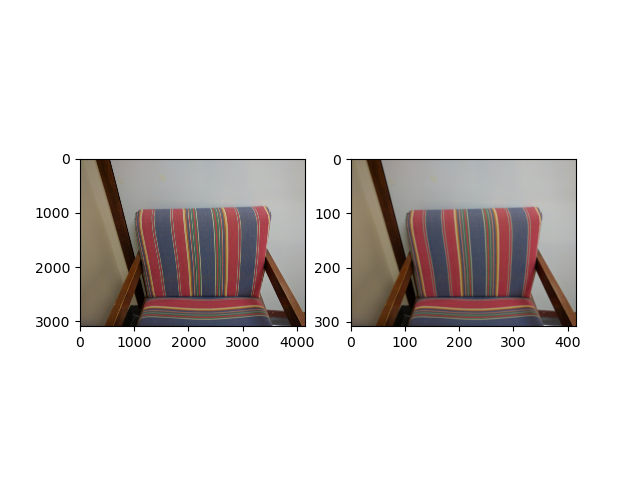

In [53]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(chair)
ax2.imshow(small)

### Manipulating Pixels

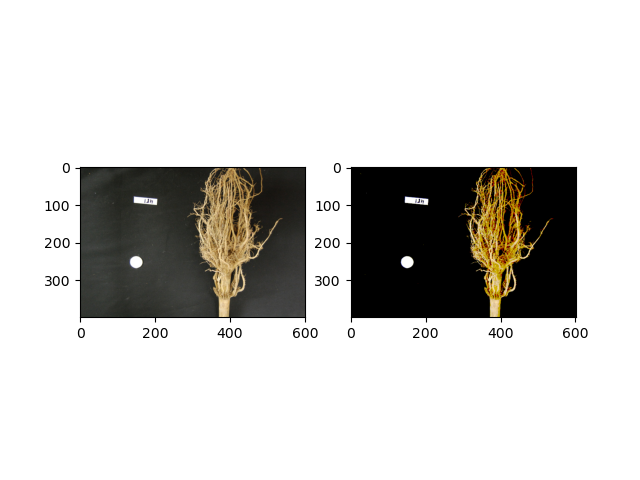

In [57]:
#keeping only high intensity pixels
maize_root = imread('data/maize-root-cluster.jpg')
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(maize_root)
maize_root[maize_root<128] = 0 
ax2.imshow(maize_root)

/var/folders/d6/y9k8fd5d2r36cln9ssdj6kqw0000gn/T/ipykernel_66471/4110842644.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,(ax1,ax2) = plt.subplots(1,2)


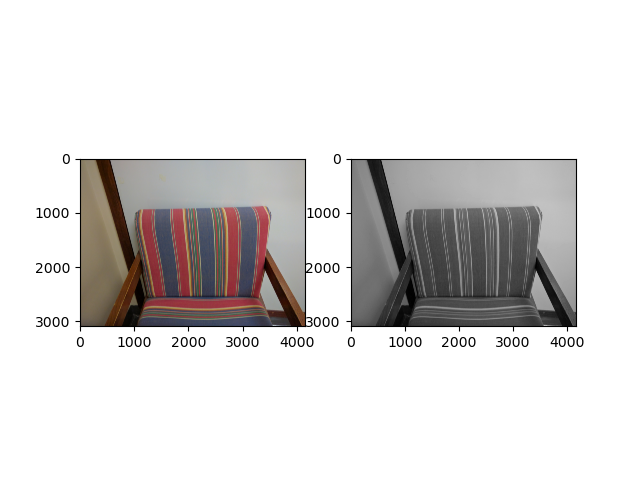

In [67]:
#converting an image to grayscale
chair = imread('data/chair.jpg')
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(chair,cmap='gray')
gray_image = skimage.color.rgb2gray(chair) #gray scale adds up the 3 channels in a way that matches human perception
ax2.imshow(gray_image,cmap='gray') 

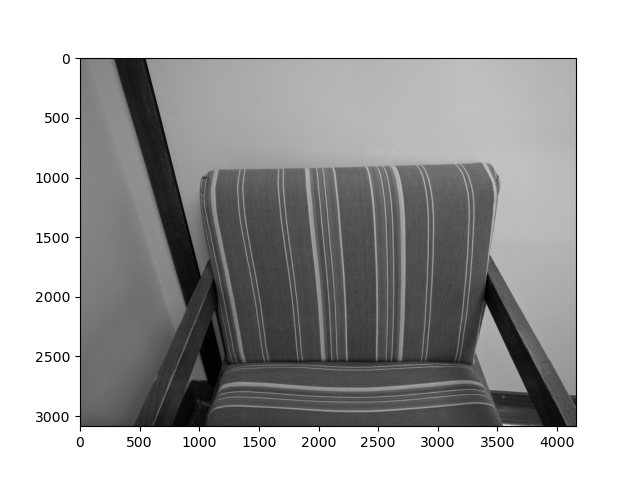

In [64]:
image = skimage.io.imread(fname="data/chair.jpg", as_gray=True) #we can also read an image as gray

# display grayscale image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")

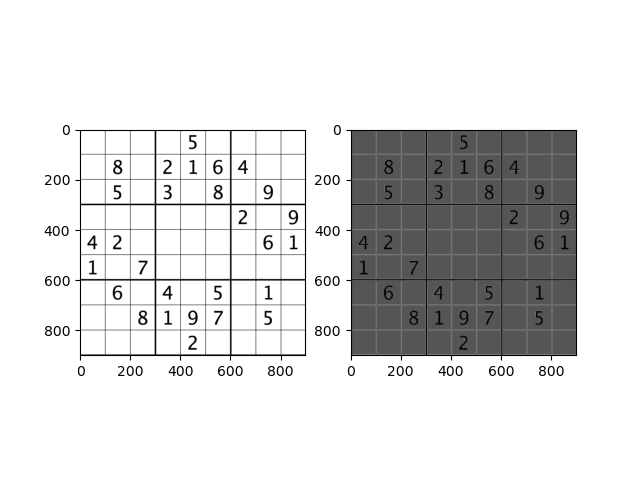

In [92]:
sudoku = imread('data/sudoku.png', as_gray=True)
fig,ax = plt.subplots(1,2)
# sudoku = skimage.img_as_ubyte(sudoku)
ax[0].imshow(sudoku,cmap='gray')
sudoku[sudoku > 0.6]= 0.2
ax[1].imshow(sudoku,cmap='gray')
# plt.colorbar()


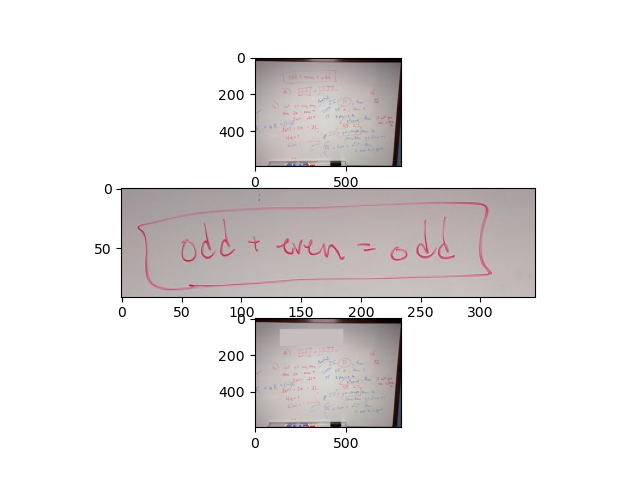

In [95]:
#Access via slicing
board = skimage.io.imread(fname="data/board.jpg")
fig, ax = plt.subplots(3,1)
ax[0].imshow(board)
clip = board[60:151, 135:481, :]
ax[1].imshow(clip)
color = board[330, 90]
board[60:151, 135:481] = color
ax[2].imshow(board)

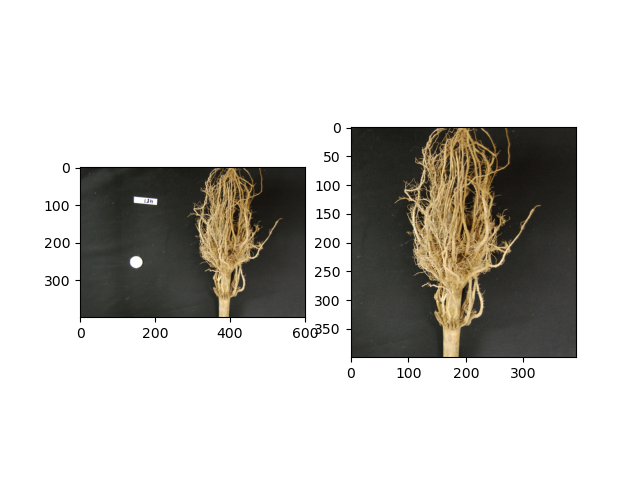

In [105]:
maize_root = imread('data/maize-root-cluster.jpg')
fig,ax = plt.subplots(1,2)
ax[0].imshow(maize_root)
clip = maize_root[:, 210:, :]
ax[1].imshow(clip)
